In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np
data = pd.read_csv("/content/campaign_responses.csv")
data.head()


,customer_id,age,gender,annual_income,credit_score,employed,marital_status,no_of_children,responded
0,1,35,Male,65000,720,Yes,Married,2,Yes
1,2,28,Female,45000,680,No,Single,0,No
2,3,42,Male,85000,750,Yes,Married,3,Yes
3,4,31,Female,55000,710,Yes,Single,1,No
4,5,47,Male,95000,790,Yes,Married,2,Yes


               Model       MAE       MSE      RMSE        R²
0      Random Forest  0.083333  0.083333  0.288675  0.657143
1      Decision Tree  0.076667  0.035333  0.187972  0.854629
2  Gradient Boosting  0.026433  0.004321  0.065736  0.982221



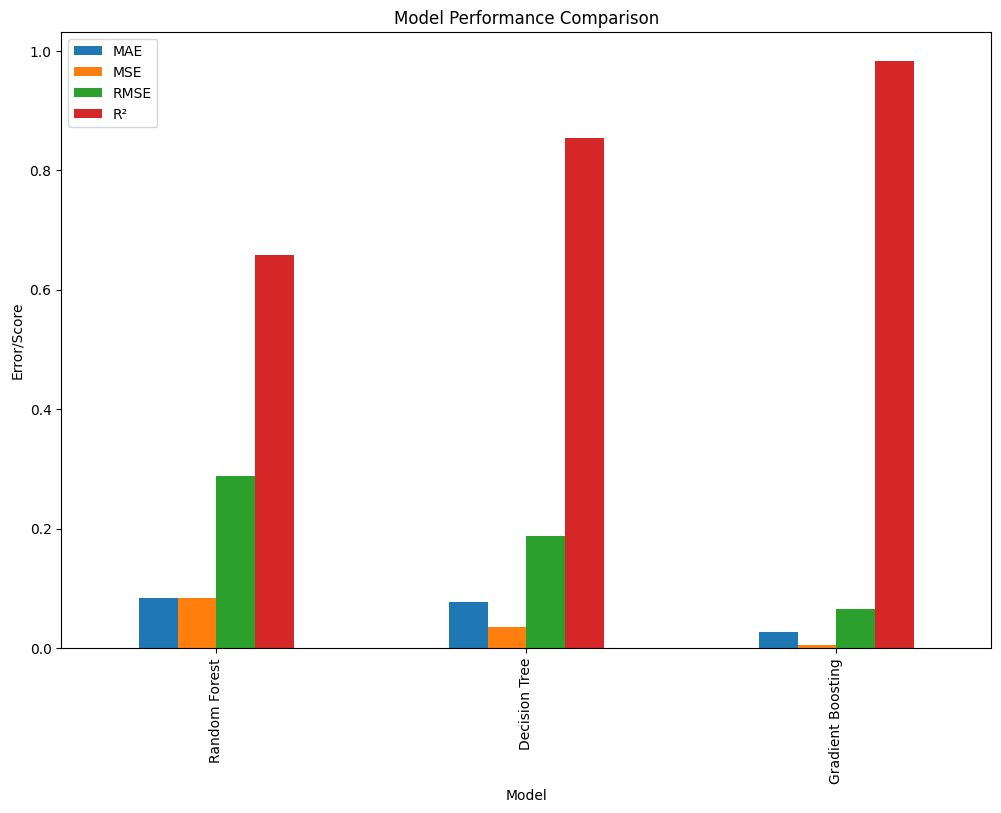

In [2]:
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['employed'] = label_encoder.fit_transform(data['employed'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['responded'] = label_encoder.fit_transform(data['responded'])
X = data[['age', 'gender', 'annual_income', 'credit_score', 'employed', 'marital_status',
'no_of_children']]
y = data['responded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.select_dtypes(include=[int, float])
X_test = X_test.select_dtypes(include=[int, float])
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
y_train=label_encoder.fit_transform(y_train)
y_test=label_encoder.transform(y_test)
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
gb_model = GradientBoostingRegressor(random_state=42)
gb_model.fit(X_train, y_train)
y_pred_gb = gb_model.predict(X_test)
metrics = {
"MAE": [mean_absolute_error(y_test, y_pred_dt), mean_absolute_error(y_test, y_pred_rf),
mean_absolute_error(y_test, y_pred_gb)],
"MSE": [mean_squared_error(y_test, y_pred_dt), mean_squared_error(y_test, y_pred_rf),
mean_squared_error(y_test, y_pred_gb)],
"RMSE": [np.sqrt(mean_squared_error(y_test, y_pred_dt))],
"R²": [r2_score(y_test, y_pred_dt), r2_score(y_test, y_pred_rf), r2_score(y_test, y_pred_gb)]
}
results_df = pd.DataFrame(metrics, index=['Decision Tree', 'Random Forest', 'Gradient Boosting'])
import matplotlib.pyplot as plt
results = {
'Model': ['Random Forest', 'Decision Tree', 'Gradient Boosting'],
'MAE': [],
'MSE': [],
'RMSE': [],
'R²': []
}
for y_pred in [y_pred_dt, y_pred_rf, y_pred_gb]:
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    #rmse = root_mean_squared_error(y_test, y_pred, squared=False) # Using squared=False to
    # get RMSE directly
    r2 = r2_score(y_test, y_pred)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R²'].append(r2)
results_df = pd.DataFrame(results)
print(results_df)
print("")
results_df.plot(x='Model', kind='bar', figsize=(12, 8),
title='Model Performance Comparison',
ylabel='Error/Score',
xlabel='Model',
legend=True)
plt.show()

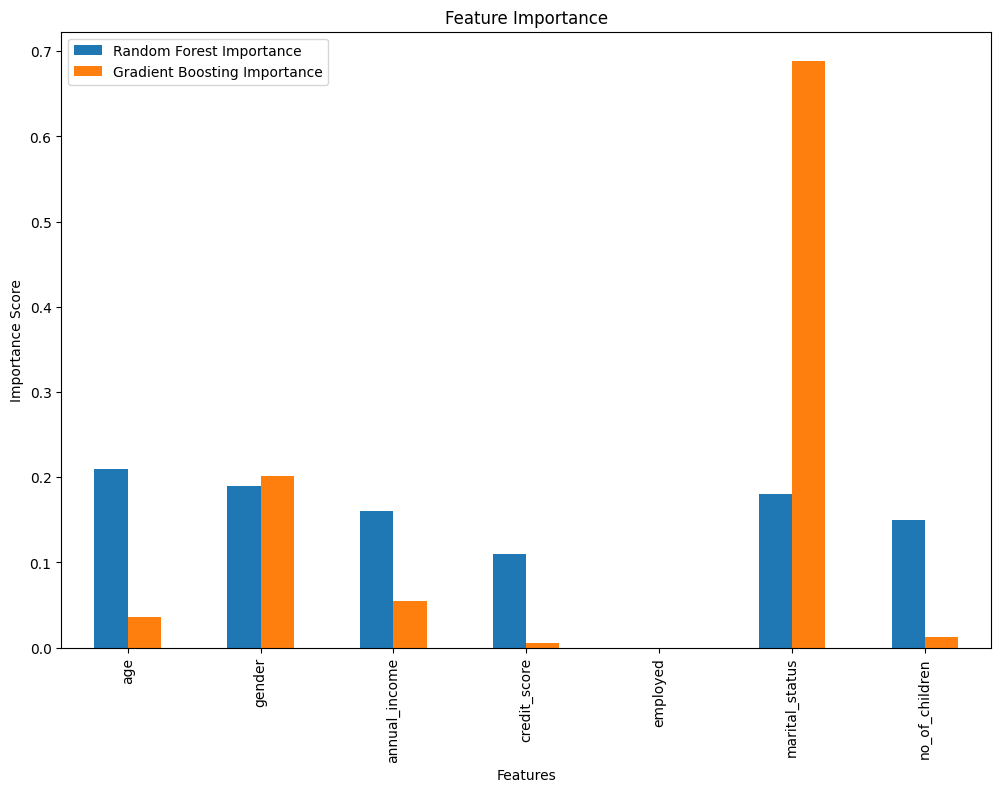

In [3]:
# Feature importance for Random Forest
rf_feature_importance = rf_model.feature_importances_
# Feature importance for Gradient Boosting
gb_feature_importance = gb_model.feature_importances_
# Combine and visualize feature importance
feature_names = X.columns
importance_df = pd.DataFrame({
'Feature': feature_names,
'Random Forest Importance': rf_feature_importance,
'Gradient Boosting Importance': gb_feature_importance
})
# Plot feature importance
importance_df.set_index('Feature').plot(kind='bar', figsize=(12, 8), title='Feature Importance')
plt.ylabel('Importance Score')
plt.xlabel('Features')
plt.show()

               Model       MAE       MSE      RMSE        R²
0      Decision Tree  0.083333  0.083333  0.288675  0.657143
1      Random Forest  0.076667  0.035333  0.187972  0.854629
2  Gradient Boosting  0.026433  0.004321  0.065736  0.982221
3            XGBoost  0.166767  0.166619  0.408190  0.314481


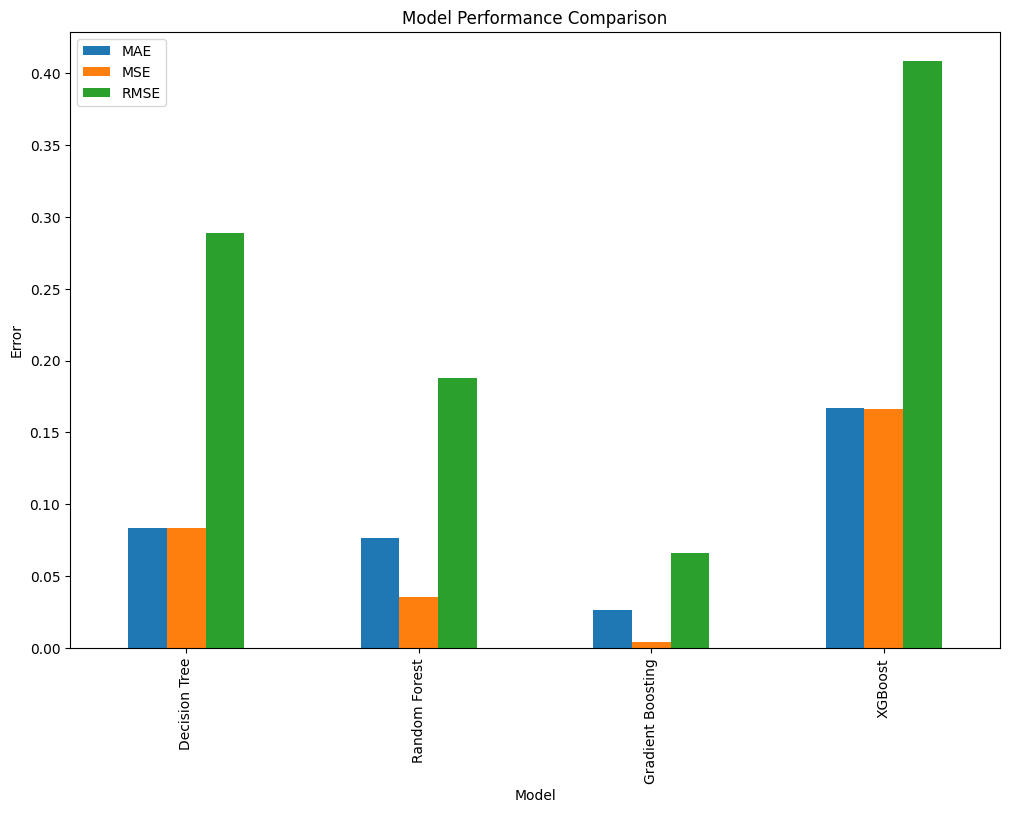

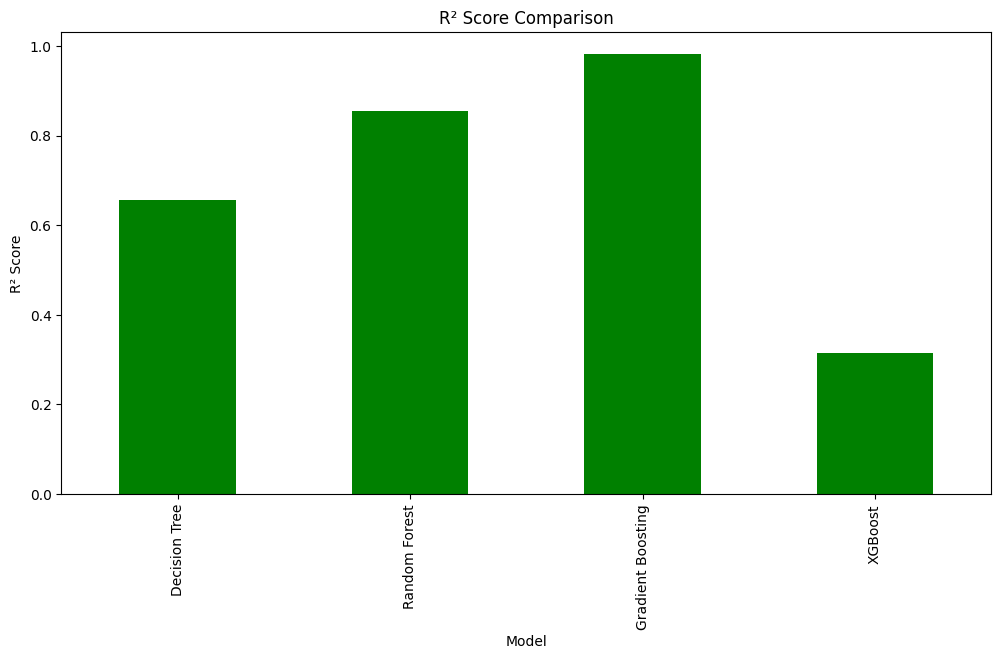

In [4]:
#MODEL PERFORMANCE COMPARISON:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
# Load the dataset
data = pd.read_csv("/content/campaign_responses.csv")
# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['employed'] = label_encoder.fit_transform(data['employed'])
data['marital_status'] = label_encoder.fit_transform(data['marital_status'])
data['responded'] = label_encoder.fit_transform(data['responded'])
# Define features and target
X = data[['age', 'gender', 'annual_income', 'credit_score', 'employed', 'marital_status',
'no_of_children']]
y = data['responded']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
# Initialize models
models = {
'Decision Tree': DecisionTreeRegressor(random_state=42),
'Random Forest': RandomForestRegressor(random_state=42),
'Gradient Boosting': GradientBoostingRegressor(random_state=42),
'XGBoost': XGBRegressor(random_state=42)
}
# Train models and evaluate metrics
results = {'Model': [], 'MAE': [], 'MSE': [], 'RMSE': [], 'R²': []}
for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Predict on test data
    y_pred = model.predict(X_test)
    # Calculate metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)
    # Store results
    results['Model'].append(model_name)
    results['MAE'].append(mae)
    results['MSE'].append(mse)
    results['RMSE'].append(rmse)
    results['R²'].append(r2)
# Convert results into a DataFrame
results_df = pd.DataFrame(results)
print(results_df)
# Visualize the results
results_df.set_index('Model', inplace=True)
results_df[['MAE', 'MSE', 'RMSE']].plot(kind='bar', figsize=(12, 8), title='Model Performance Comparison')
plt.ylabel('Error')
plt.show()
results_df['R²'].plot(kind='bar', color='green', figsize=(12, 6), title='R² Score Comparison')
plt.ylabel('R² Score')
plt.show()